In [1]:
import sys
sys.path.insert(0, '../../code/')
from dismod_db import DismodDB
from two_level import TwoLevel
from plot_two_level import PlotTwoLevel
import numpy as np
import pandas as pd
from dismod_output import DismodOutput

#### Read in simulated data

In [2]:
data = pd.read_csv('spline_sim_data.csv')
data['measure'] = 'Sincidence'
data['location_name'] = 'dummy'

In [18]:
locations = ['dummy']
integrand = ['Sincidence']
rates = ['iota']
#meas_noise_density = {'Sincidence':{'density':'students', 'nu': 30}}
meas_noise_density = {'Sincidence': {'density': 'gaussian'}}
rates_parent_priors = [
    # rate priors for iota
    ({'density':'uniform','upper':1.0,'lower':1e-4,'mean': .01},\
    {'density': 'gaussian', 'mean':0.0, 'std': 1e-1},\
    {'density': 'gaussian', 'mean':0.0, 'std': 1e-2})]
rates_child_priors = [
    # rate priors for iota
    ({'density':'gaussian','mean': 0.0, 'std': 5}, None, None)]
#---------change path------------
path_to_db = 'incidence_spline_sim.db'

db = DismodDB(data, locations, integrand,rates, rates_parent_priors, 
              rates_child_priors, meas_noise_density,path_to_db, age_list=np.linspace(0, 2*np.pi, 20), 
              time_list=list(range(1, 6)))

In [19]:
model = TwoLevel(db)

In [20]:
model.fit_fixed(tol=1e-18)

/home/prefix/dismod_at.release/bin/dismod_at incidence_spline_sim.db init
incidence_spline_sim.db fit fixed
incidence_spline_sim.db predict fit_var


{0: 'all', 1: 'dummy'}


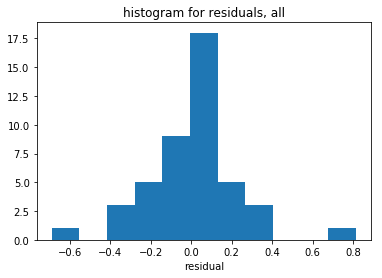

In [21]:
path = './'
plt = PlotTwoLevel(path, 'incidence_spline_sim.db')
plt.plot_residuals('all', 'Sincidence')

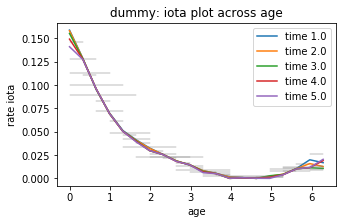

In [22]:
plt.plot_change_over_age('rate', 'iota', 'Sincidence', ['dummy'], plot_data=True)

- tightening time difference prior will move fits closer.